In [100]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np

In [391]:
import configparser
from pathlib import Path
import os
config = configparser.ConfigParser()
config.read_file(open(f"{Path(os.getcwd())}/configfile.cfg"))

cid = config['KEYS']['cid']
secret = config['KEYS']['secret']
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [123]:
#weekly song charts 40 countries
playlist_dic = {'Argentina':'https://open.spotify.com/playlist/37i9dQZEVXbKPTKrnFPD0G?si=03434d53bc6d43b5',
               'Australia':'https://open.spotify.com/playlist/37i9dQZEVXbK4fwx2r07XW?si=37d468eeadcb459f',
                'Austria':'https://open.spotify.com/playlist/37i9dQZEVXbM1EaZ0igDlz?si=404af10c87db4ca7',
               'Belarus':'https://open.spotify.com/playlist/37i9dQZEVXbLRLeF2cVSaP?si=b511c38177114e57',
                'Belgium':'https://open.spotify.com/playlist/37i9dQZEVXbND4ZYa46PaA?si=e88fb610001244db',
                'Brazil':'https://open.spotify.com/playlist/37i9dQZEVXbKzoK95AbRy9?si=8b9192ad8d1146cf',
                'Canada':'https://open.spotify.com/playlist/37i9dQZEVXbMda2apknTqH?si=001159cb37ec4f90',
                'Chile':'https://open.spotify.com/playlist/37i9dQZEVXbLJ0paT1JkgZ?si=4416e2adf1cf41ae',
               'Colombia':'https://open.spotify.com/playlist/37i9dQZEVXbL1Fl8vdBUba?si=603ed54f2c5f4e3a',
                'Denmark':'https://open.spotify.com/playlist/37i9dQZEVXbMw2iUtFR5Eq?si=502e77e175ad4fc7',
                'Dominican Republic':'https://open.spotify.com/playlist/37i9dQZEVXbMPoK06pe7d6?si=d58b148a0fb24772',
                'Egypt':'https://open.spotify.com/playlist/37i9dQZEVXbMy2EcFg5F9m?si=a9e738814ad541a7',
                'Finland':'https://open.spotify.com/playlist/37i9dQZEVXbJQ9kF73GOT2?si=2248046ebab443fc',
                'Frances':'https://open.spotify.com/playlist/37i9dQZEVXbKQ1ogMOyW9N?si=9668b73f7ef845cd',
                'Germany':'https://open.spotify.com/playlist/37i9dQZEVXbK8BKKMArIyl?si=669b612de49e4401',
                'Hong Kong':'https://open.spotify.com/playlist/37i9dQZEVXbMdvweCgpBAe?si=ffefd074adba467c',
                'India':'https://open.spotify.com/playlist/37i9dQZEVXbMWDif5SCBJq?si=69713fc98c644f57',
                'Indonesia':'https://open.spotify.com/playlist/37i9dQZEVXbIZK8aUquyx8?si=f02b876e18c14f4a',
                'Israel':'https://open.spotify.com/playlist/37i9dQZEVXbJ5J1TrbkAF9?si=16e95b617dfb48ee',
                'Italy':'https://open.spotify.com/playlist/37i9dQZEVXbJUPkgaWZcWG?si=ba4097dae1af4a09',
                'Japan':'https://open.spotify.com/playlist/37i9dQZEVXbKqiTGXuCOsB?si=f59d5e11dd4a41f4',
                'Kazakhastan':'https://open.spotify.com/playlist/37i9dQZEVXbLeBcWrdps2V?si=065dc0c72f5d49d0',
                'Malaysia':'https://open.spotify.com/playlist/37i9dQZEVXbKcS4rq3mEhp?si=d48bb985b9844cbe',
                'Mexico':'https://open.spotify.com/playlist/37i9dQZEVXbKUoIkUXteF6?si=bc391406f4ff4280',
                'Morocco':'https://open.spotify.com/playlist/37i9dQZEVXbNM8vS9cIqAG?si=f9cf8f5e57c44db5',
                'Nigeria': 'https://open.spotify.com/playlist/37i9dQZEVXbLw80jjcctV1?si=e7ef7a148ff547c9',
                'Norway':'https://open.spotify.com/playlist/37i9dQZEVXbLWYFZ5CkSvr?si=2a784ae8fd4042fb',
                'Netherlands':'https://open.spotify.com/playlist/37i9dQZEVXbK4BFAukDzj3?si=48dfb760ef0b4232',
                'Pakistan':'https://open.spotify.com/playlist/37i9dQZEVXbNy9tB5elXf1?si=924ad8b1cb274b00',
                'Poland':'https://open.spotify.com/playlist/37i9dQZEVXbMZ5PAcNTDXd?si=478d3ace77cb496f',
                'South Korea':'https://open.spotify.com/playlist/37i9dQZEVXbJZGli0rRP3r?si=18e880d1eae74cd3',
                'South Africa':'https://open.spotify.com/playlist/37i9dQZEVXbJV3H3OfCN1z?si=bd45d694bd014bd5',
                'Spain':'https://open.spotify.com/playlist/37i9dQZEVXbJwoKy8qKpHG?si=4321fe13582d40a8',
                'Taiwan':'https://open.spotify.com/playlist/37i9dQZEVXbMVY2FDHm6NN?si=be5768dc323b439d',
                'Turkey':'https://open.spotify.com/playlist/37i9dQZEVXbJARRcHjHcAr?si=2c520c1f821f4edd',
                'Thailand':'https://open.spotify.com/playlist/37i9dQZEVXbJ7qiJCES5cj?si=3c26d8cb9eb4474b',
                'Ukraine':'https://open.spotify.com/playlist/37i9dQZEVXbNcoJZ65xktI?si=21e5cf1aad4d477b',
                'UK':'https://open.spotify.com/playlist/37i9dQZEVXbMwmF30ppw50?si=96ac824c299d4a4a',
                'USA': 'https://open.spotify.com/playlist/37i9dQZEVXbLp5XoPON0wI?si=6d6fa8dc03844a6c',
                'Vietnam':'https://open.spotify.com/playlist/37i9dQZEVXbKZyn1mKjmIl?si=f58595ca3991497d',
               }

In [124]:
len(playlist_dic)

40

In [125]:
track_uri = []
track_name = []
artist_uri =[]
artist_name =[]
artist_fame =[]
artist_gen =[]
track_fame=[]
playlist = list(playlist_dic.values())

In [105]:
len(track_uri)

0

In [94]:
for j in range(4):
    for i in range(10*j, 10*(j+1)):
        uri = playlist[i].split("/")[-1].split("?")[0]
        for track in sp.playlist_tracks(uri)["items"]:
            #URI
            track_uri.append(track["track"]["uri"])

            #Track name
            track_name.append(track["track"]["name"])

            #Main Artist
            au = track["track"]["artists"][0]["uri"]
            artist_uri.append(au)
            ai = sp.artist(au)
            #Name, popularity, genre
            artist_name.append(track["track"]["artists"][0]["name"])
            artist_fame.append(ai["popularity"])
            artist_gen.append(ai["genres"])

            #Popularity of the track
            track_fame.append(track["track"]["popularity"])

ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [127]:
# to deal with timeout i separate the job
for i in range(30, 40):
    uri = playlist[i].split("/")[-1].split("?")[0]
    for track in sp.playlist_tracks(uri)["items"]:
        #URI
        track_uri.append(track["track"]["uri"])

        #Track name
        track_name.append(track["track"]["name"])

        #Main Artist
        au = track["track"]["artists"][0]["uri"]
        artist_uri.append(au)
        ai = sp.artist(au)
        #Name, popularity, genre
        artist_name.append(track["track"]["artists"][0]["name"])
        artist_fame.append(ai["popularity"])
        artist_gen.append(ai["genres"])

        #Popularity of the track
        track_fame.append(track["track"]["popularity"])

In [128]:
track_uri1 = track_uri1 + track_uri.copy()
track_name1 = track_name1 + track_name.copy()
artist_uri1 = artist_uri1 + artist_uri.copy()
artist_name1 =artist_name1 + artist_name.copy()
artist_fame1 = artist_fame1 +artist_fame.copy()
artist_gen1 = artist_gen1+artist_gen.copy()
track_fame1 = track_fame1+track_fame.copy()

In [131]:
track_uri = track_uri1.copy()
track_name = track_name1.copy()
artist_uri = artist_uri1.copy()
artist_name =artist_name1.copy()
artist_fame = artist_fame1.copy()
artist_gen = artist_gen1.copy()
track_fame = track_fame1.copy()

In [132]:
dic = {'track_uri':track_uri,
      'track_name' : track_name,
       'artist_uri' : artist_uri,
       'artist_name' : artist_name,
       'artist_genre' : artist_gen,
       'track_fame' : track_fame
      }
df = pd.DataFrame(data=dic)
df

,track_uri,track_name,artist_uri,artist_name,artist_genre,track_fame
0,spotify:track:5ww2BF9slyYgNOk37BlC4u,La Bachata,spotify:artist:0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,"[colombian pop, latin pop, reggaeton, reggaeto...",97
1,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",spotify:artist:716NhGYqD1jl2wI1Qkgq36,Bizarrap,"[argentine hip hop, pop venezolano, trap argen...",97
2,spotify:track:45dlaEXrXW47TVbrQ4gK7E,Tu Turrito,spotify:artist:4IG1SDlwgNKzqTmjBrvY3K,Rei,[trap argentino],83
3,spotify:track:3Ne5uYDFzHEFYAPbaBMIck,AUTOMÁTICO,spotify:artist:1DxLCyH42yaHKGK3cl5bvG,Maria Becerra,"[latin pop, pop argentino]",84
4,spotify:track:53tfEupEzQRtVFOeZvk7xq,DESPECHÁ,spotify:artist:7ltDVBr6mKbRvohxheJ9h1,ROSALÍA,[r&b en espanol],85
...,...,...,...,...,...,...
1995,spotify:track:5BTzf3doGTigDIYUFtbkI9,Sinh Ra Đã Là Thứ Đối Lập Nhau (feat. Badbies),spotify:artist:4bPYvyUn1mWwUwIW57oST2,Emcee L (Da LAB),"[v-pop, vietnamese hip hop]",59
1996,spotify:track:38rjRVqEHSlDRrDWDvjkqW,Bước Qua Nhau,spotify:artist:57g2v7gJZepcwsuwssIfZs,Vũ.,"[indie viet, rock viet, v-pop, vietnamese sing...",54
1997,spotify:track:0ibp5h8QATkvC6P5cO5TUV,PHONG (feat. TGSN & Tyronee),spotify:artist:2aMo0CYbTieTisS0BlWc59,VSTRA,[],59
1998,spotify:track:0L8LOav65XwLjCLS11gNPD,Typa Girl,spotify:artist:41MozSoPIsD1dJM0CLPjZF,BLACKPINK,"[k-pop, k-pop girl group]",81


In [169]:
danceability = []
energy =[]
key =[]
loudness =[]
speechiness =[]
acousticness=[]
instrumentalness = []
tempo = []
duration = []
track_len = len(track_uri)

In [170]:
for i in range(1500,2000):
    s = sp.audio_features(track_uri[i])
    if s[0] == None:
        danceability.append(np.mean(danceability))
        energy.append(np.mean(energy))
        key.append(np.mean(key))
        loudness.append(np.mean(loudness))
        speechiness.append(np.mean(speechiness))
        acousticness.append(np.mean(acousticness))
        instrumentalness.append(np.mean(instrumentalness))
        tempo.append(np.mean(tempo))
        duration.append(np.mean(duration))
    else:
        danceability.append(s[0]['danceability'])
        energy.append(s[0]['energy'])
        key.append(s[0]['key'])
        loudness.append(s[0]['loudness'])
        speechiness.append(s[0]['speechiness'])
        acousticness.append(s[0]['acousticness'])
        instrumentalness.append(s[0]['instrumentalness'])
        tempo.append(s[0]['tempo'])
        duration.append(s[0]['duration_ms'])

In [171]:
danceability1 = danceability1 + danceability.copy()
energy1 = energy1 + energy.copy()
key1 = key1 + key.copy()
loudness1 = loudness1 + loudness.copy()
speechiness1 = speechiness1 + speechiness.copy()
acousticness1 = acousticness1 + acousticness.copy()
instrumentalness1 = instrumentalness1 + instrumentalness.copy()
tempo1 = tempo1 + tempo.copy()
duration1 = duration1 + duration.copy()

In [177]:
danceability = danceability1.copy()
energy = energy1.copy()
key = key1.copy()
loudness = loudness1.copy()
speechiness = speechiness1.copy()
acousticness = acousticness1.copy()
instrumentalness = instrumentalness1.copy()
tempo = tempo1.copy()
duration = duration1.copy()

In [178]:
len(energy)

2000

In [179]:
dic_feat = {'track_uri':track_uri,
      'track_name' : track_name,
       'danceability' : danceability,
       'energy' : energy,
       'key' : key,
       'loudness' : loudness,
        'speechiness': speechiness,
        'acousticness': acousticness,
        'instrumentalness' : instrumentalness,
        'tempo' : tempo,
        'duration' : duration,
        'popularity' : track_fame
      }
df_feat = pd.DataFrame(data=dic_feat)
df_feat

,track_uri,track_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,tempo,duration,popularity
0,spotify:track:5ww2BF9slyYgNOk37BlC4u,La Bachata,0.835,0.679,7.0,-5.329,0.0364,0.5830,0.000002,124.980,162638.0,97
1,spotify:track:2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.782,2.0,-5.548,0.0440,0.0125,0.033000,128.033,198938.0,97
2,spotify:track:45dlaEXrXW47TVbrQ4gK7E,Tu Turrito,0.838,0.545,9.0,-6.100,0.0604,0.0966,0.000000,90.023,164701.0,83
3,spotify:track:3Ne5uYDFzHEFYAPbaBMIck,AUTOMÁTICO,0.680,0.808,10.0,-3.854,0.2240,0.0911,0.000002,176.131,175317.0,84
4,spotify:track:53tfEupEzQRtVFOeZvk7xq,DESPECHÁ,0.914,0.622,7.0,-6.538,0.0892,0.1460,0.000017,130.040,156788.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,spotify:track:5BTzf3doGTigDIYUFtbkI9,Sinh Ra Đã Là Thứ Đối Lập Nhau (feat. Badbies),0.494,0.395,6.0,-8.653,0.0301,0.8870,0.000014,141.464,234168.0,59
1996,spotify:track:38rjRVqEHSlDRrDWDvjkqW,Bước Qua Nhau,0.541,0.339,1.0,-6.499,0.0268,0.7420,0.000109,135.757,257647.0,54
1997,spotify:track:0ibp5h8QATkvC6P5cO5TUV,PHONG (feat. TGSN & Tyronee),0.786,0.412,8.0,-8.717,0.0523,0.7490,0.002490,119.897,212000.0,59
1998,spotify:track:0L8LOav65XwLjCLS11gNPD,Typa Girl,0.915,0.621,7.0,-6.519,0.1000,0.0745,0.000000,131.984,179173.0,81


In [183]:
df_feat.to_csv('feature', index=False)
df.to_csv('song_artist', index=False)

### EDA

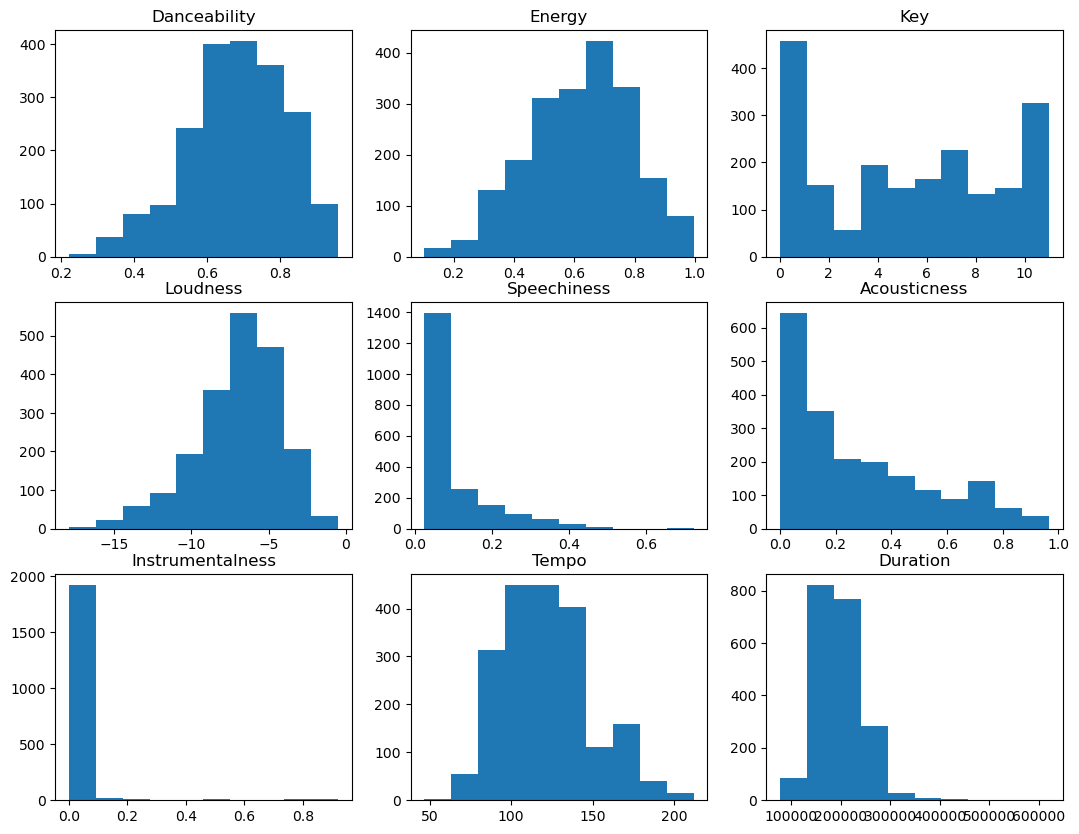

In [184]:
import matplotlib.pyplot as plt
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(13, 10))
ax1.hist(df_feat.iloc[:,[2]])
ax1.title.set_text('Danceability')
ax2.hist(df_feat.iloc[:,[3]])
ax2.title.set_text('Energy')
ax3.hist(df_feat.iloc[:,[4]])
ax3.title.set_text('Key')
ax4.hist(df_feat.iloc[:,[5]])
ax4.title.set_text('Loudness')
ax5.hist(df_feat.iloc[:,[6]])
ax5.title.set_text('Speechiness')
ax6.hist(df_feat.iloc[:,[7]])
ax6.title.set_text('Acousticness')
ax7.hist(df_feat.iloc[:,[8]])
ax7.title.set_text('Instrumentalness')
ax8.hist(df_feat.iloc[:,[9]])
ax8.title.set_text('Tempo')
ax9.hist(df_feat.iloc[:,[10]])
ax9.title.set_text('Duration')

In [65]:
# data eda - correlation - 
# data preprocessing - normalize
# model linear, xgboost, svm
# clustering
# recommendation system
# deployment (docker)

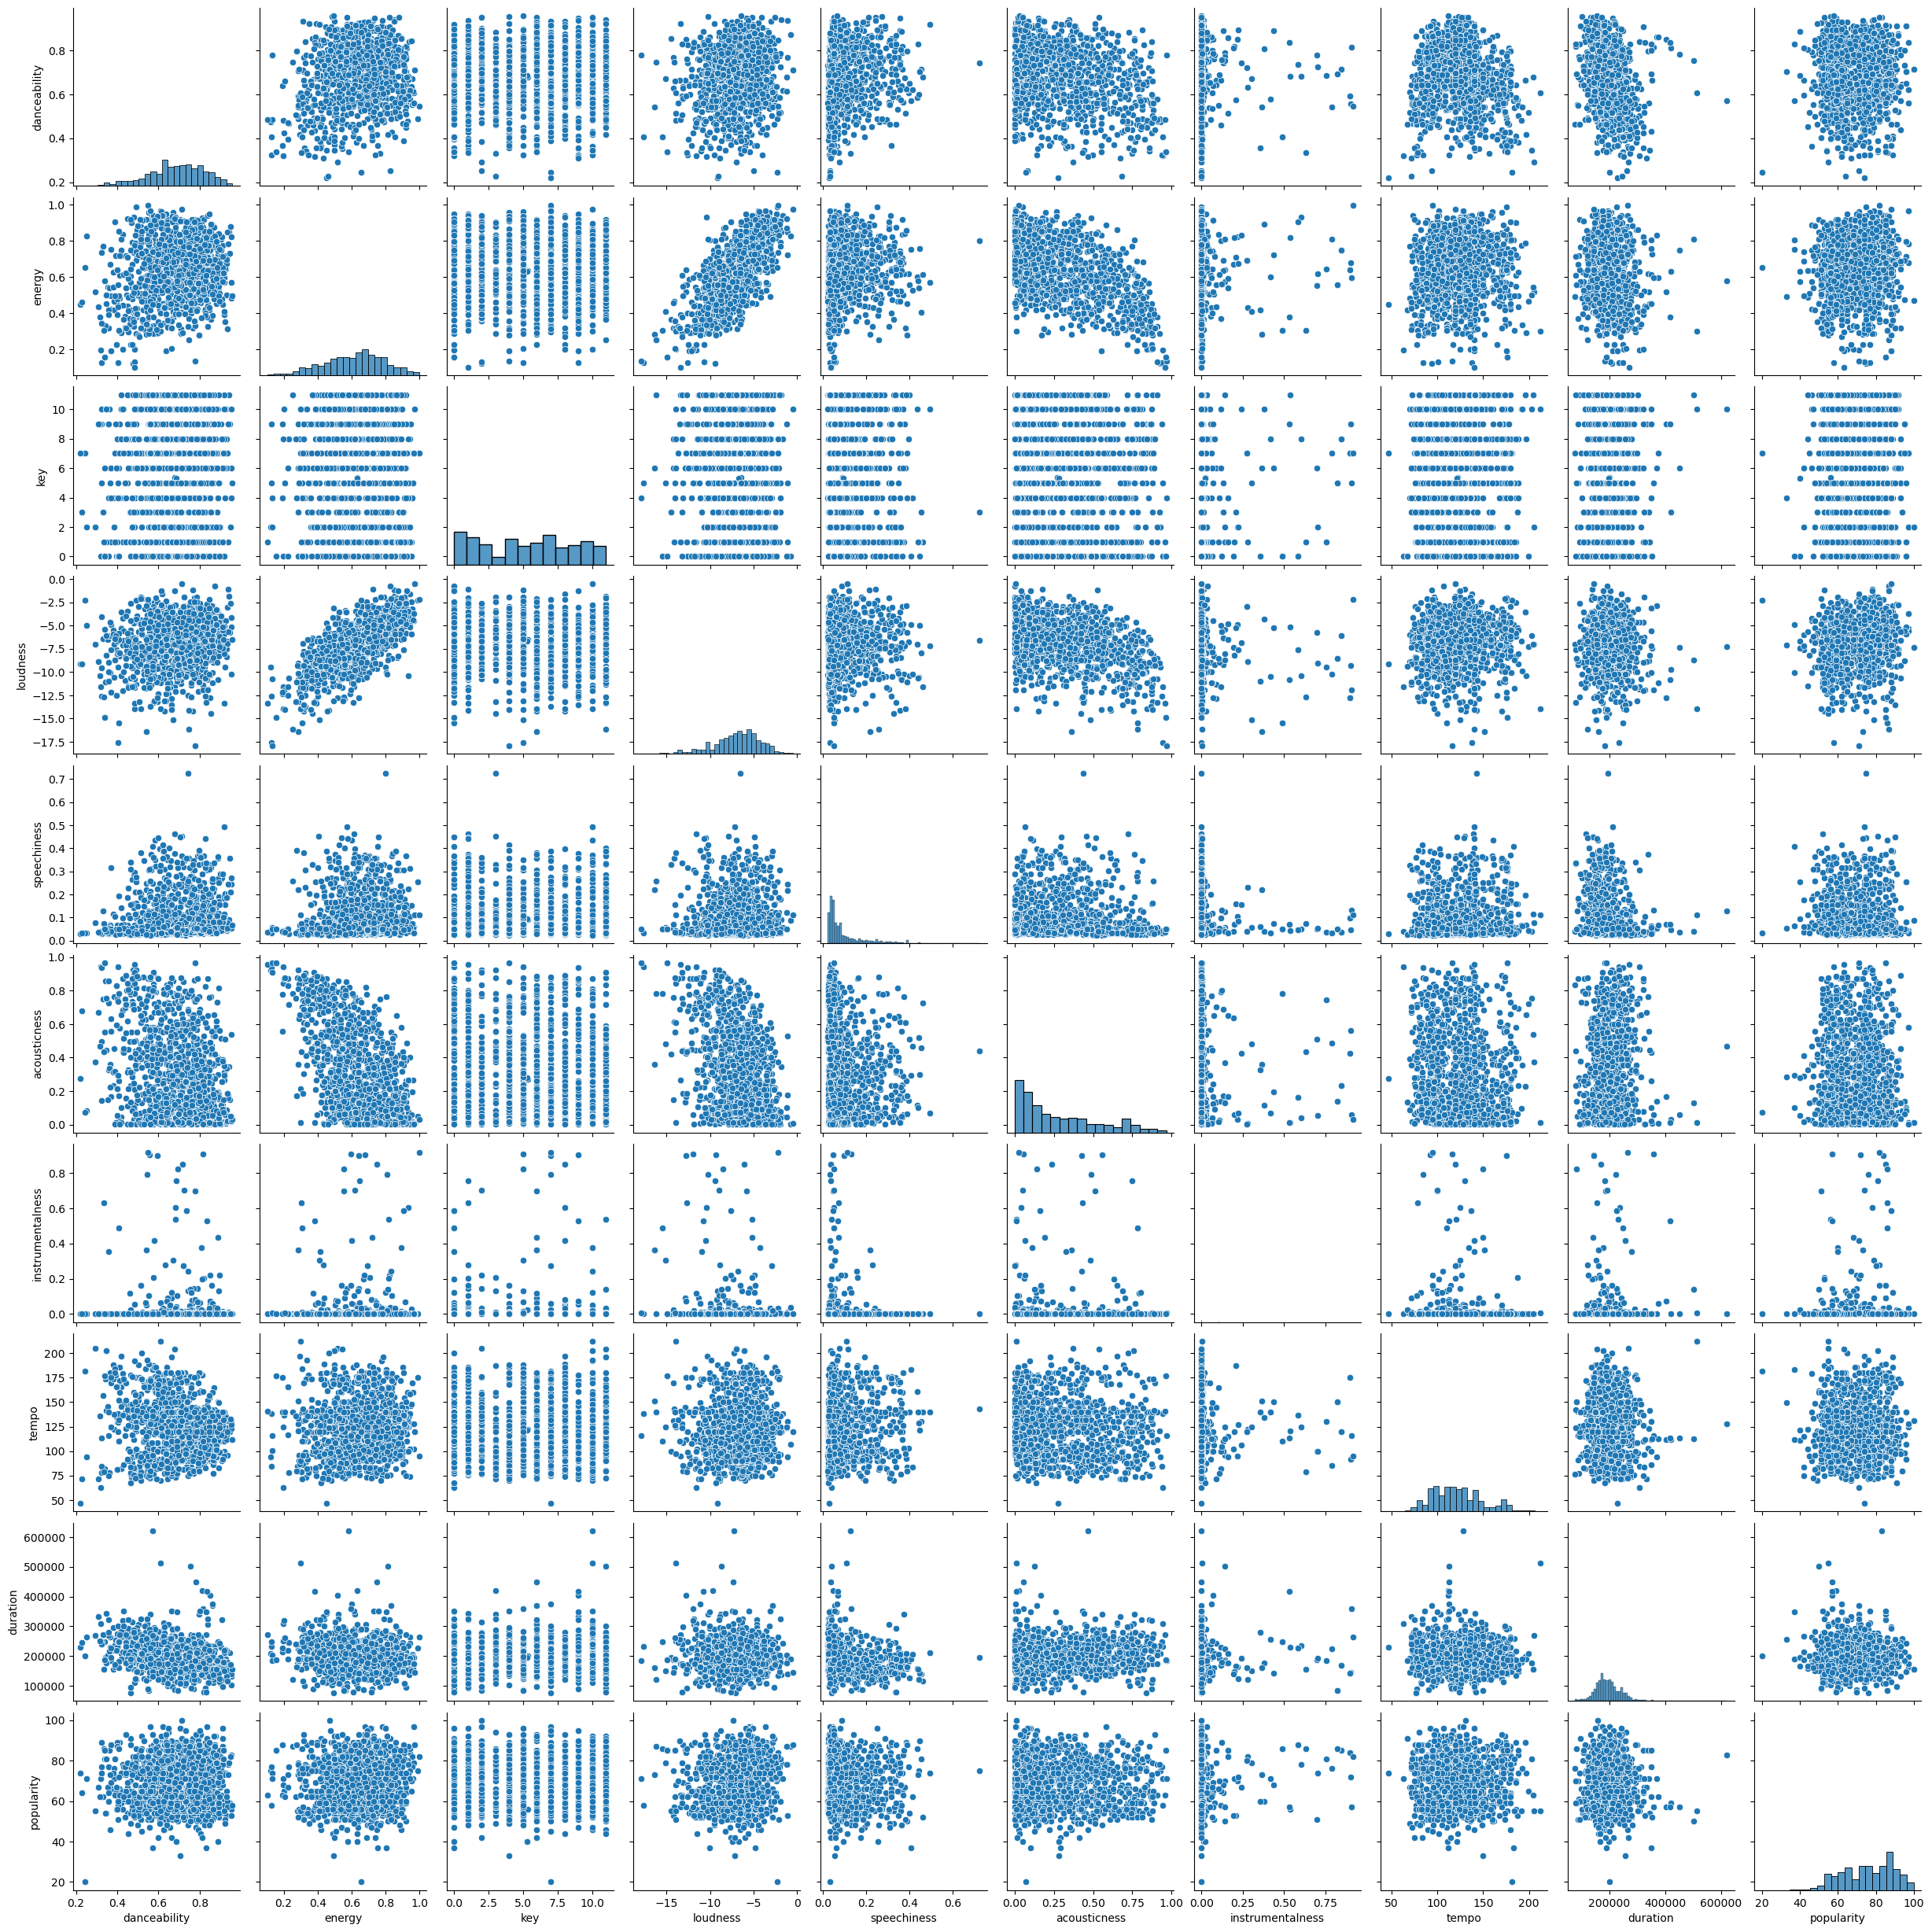

In [185]:
import seaborn as sns
sns.pairplot(df_feat)

In [ ]:
# remove loudness since correlated with energy
# remove instrumentals since none of these are instrumentals

<AxesSubplot:>

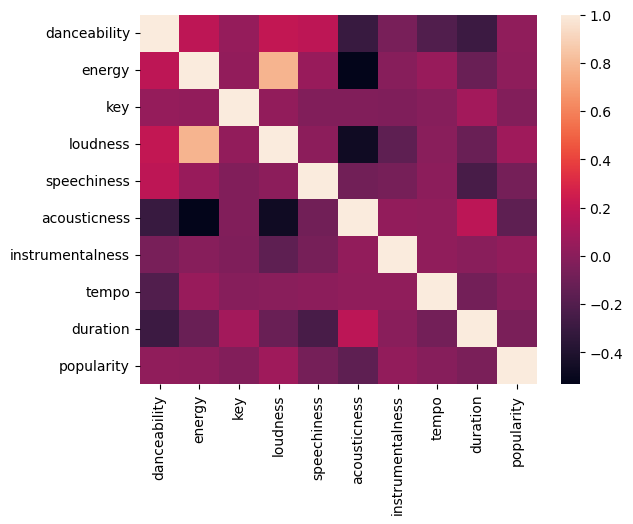

In [186]:
sns.heatmap(df_feat.corr())

### Data Preprocessing and summarization

In [189]:
df_sum = df_feat[['danceability', 'energy', 'key', 'speechiness', 'acousticness', 'tempo', 'duration']]
sum_ls = []
for i in range(1,41):
    sum_ls.append(df_sum.iloc[50*(i-1):50*i,].sum(axis = 0))

In [265]:
summarize = pd.DataFrame(sum_ls)
summarize['speechiness'] = np.log(summarize['speechiness'])
summarize['acousticness'] = np.log(summarize['acousticness'])

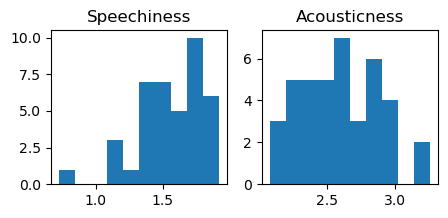

In [266]:
fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(5, 2))
ax1.hist(summarize.iloc[:,[3]])
ax1.title.set_text('Speechiness')
ax2.hist(summarize.iloc[:,[4]])
ax2.title.set_text('Acousticness')

#### Clustering

In [267]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
sc = scaler.fit_transform(summarize)
dist_df = []
for num_clusters in range(1,11):
    km = KMeans(n_clusters = num_clusters)
    km.fit(sc)
    dist_df.append([num_clusters, km.inertia_])
kmeans_df = pd.DataFrame(dist_df, columns = ['number_of_clusters', 'distance'])

<AxesSubplot:xlabel='number_of_clusters'>

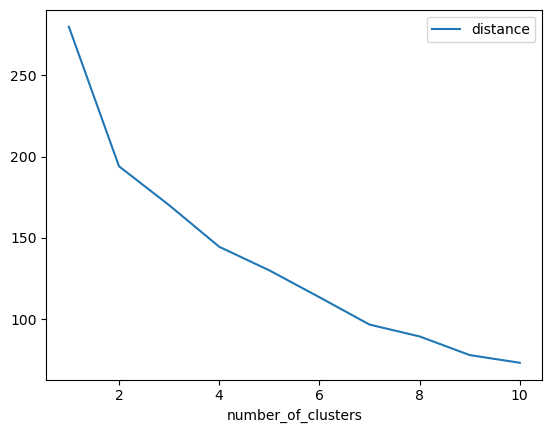

In [268]:
kmeans_df.set_index("number_of_clusters").plot()

In [269]:
from sklearn.mixture import GaussianMixture

dist_df = []
for num_clusters in range(1,11):
    gmm = GaussianMixture(n_components=num_clusters)
    gmm.fit(sc)
    dist_df.append([num_clusters, gmm.bic(sc)])
gaussian_df = pd.DataFrame(dist_df, columns = ['number_of_clusters', 'distance'])

<AxesSubplot:xlabel='number_of_clusters'>

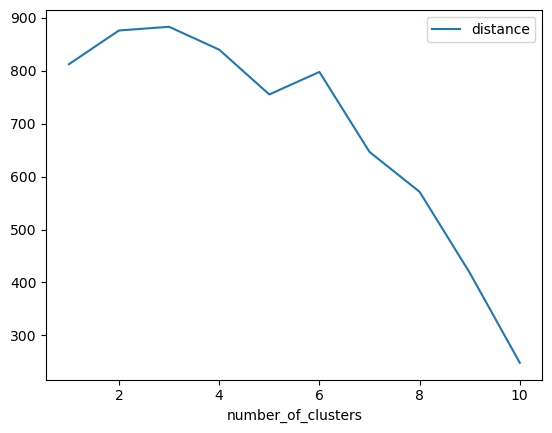

In [270]:
gaussian_df.set_index("number_of_clusters").plot()

In [271]:
# we pick seven as the number of cluster
gmm = GaussianMixture(n_components=7).fit(sc)
summarize['country'] = list(playlist_dic.keys())
summarize['cluster'] = gmm.predict(sc)
gmm.predict_proba(sc)

In [273]:
summarize

,danceability,energy,key,speechiness,acousticness,tempo,duration,country,cluster
0,38.180000,32.053000,241.000000,1.691184,2.560645,5478.713000,9.385001e+06,Argentina,4
1,32.533000,29.811000,249.000000,1.483149,2.614584,6338.356000,9.797453e+06,Australia,2
2,34.595000,29.718000,250.000000,1.723195,2.589820,6349.742000,9.240759e+06,Austria,0
3,36.873000,31.939000,234.000000,1.765826,2.116350,5918.648000,7.735494e+06,Belarus,4
4,33.448000,30.892000,280.000000,1.414299,2.461078,6078.679000,9.733087e+06,Belgium,5
5,34.126000,35.103000,244.000000,1.789607,2.954968,6402.191000,9.277747e+06,Brazil,6
6,31.781000,28.333000,271.000000,1.426884,2.738414,6353.075000,9.894100e+06,Canada,2
7,40.019000,35.285000,253.000000,1.711128,2.213348,5418.098000,1.016253e+07,Chile,4
8,38.960000,34.157000,264.000000,1.840264,2.275069,6157.527000,9.822268e+06,Colombia,0
9,34.470000,30.509000,276.000000,1.573313,2.493934,5986.216000,9.260914e+06,Denmark,5


In [274]:
# Japan has the most special music type overall
# Most of the English epeaking countries are the same cluster in 0
# Electric music are more in cluster 1
# Egypt and Frances are the same cluster??

#### Logistic Model

In [287]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
y = summarize['cluster']
x = sc
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(x, y.values)
print(rfe.ranking_)

[1 1 5 1 3 2 4]


In [331]:
label = []
for i in range(40):
    label += [summarize['cluster'][i]]*50

In [346]:
df_sum = df_feat[['danceability', 'energy', 'key', 'speechiness', 'acousticness', 'tempo', 'duration']]
df_sum['speechiness'] = np.log(df_sum['speechiness'])
df_sum['acousticness'] = np.log(df_sum['acousticness'])
scaler = StandardScaler()
stand = scaler.fit_transform(df_sum)

/var/folders/mb/0x6_nksd0j7gp4qss9q54zs00000gn/T/ipykernel_17189/435173550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['speechiness'] = np.log(df_sum['speechiness'])
/var/folders/mb/0x6_nksd0j7gp4qss9q54zs00000gn/T/ipykernel_17189/435173550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['acousticness'] = np.log(df_sum['acousticness'])


In [ ]:
# danceability, energy, acousticness are variables that are most important 

In [369]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 30)

In [370]:
y_train.values.ravel()

array(['5', '4', '0', '4', '4', '5', '0', '2', '2', '2', '2', '0', '3',
       '0', '2', '1', '0', '0', '2', '4', '4', '4', '1', '0', '0', '5',
       '2', '2'], dtype=object)

In [371]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(random_state=0).fit(X_train, y_train.values.ravel())
pred = clf.predict(X_test)
score = clf.score(X_test, y_test.values.ravel())
cm = metrics.confusion_matrix(y_test, pred)

In [372]:
pred

array(['0', '0', '0', '0', '5', '0', '5', '2', '0', '0', '4', '1'],
      dtype=object)

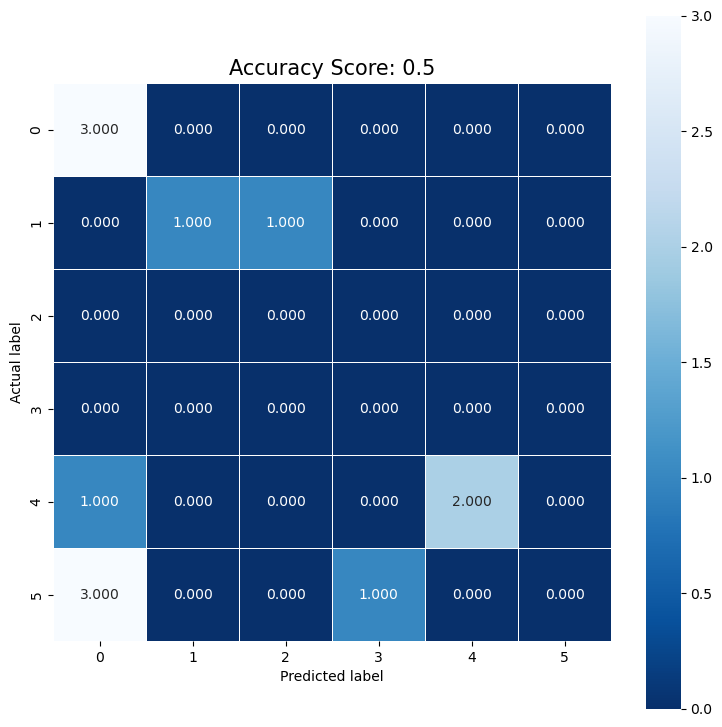

In [373]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### GMM Model Deployment with Flask

In [376]:
import pickle
with open('gmm_model.pkl', 'wb') as m:
    pickle.dump(gmm, m)

In [383]:
from flask import Flask
from flask_restful import Resource, Api, reqparse

app = Flask(__name__)
api = Api(app)

class getLabel(Resource):
    def post(self):
        parser = reqparse.RequestParser()
        parser.add_argument('danceability', type = float, required = True)
        parser.add_argument('energy', type = float, required = True)
        parser.add_argument('key', type = float, required = True)
        parser.add_argument('speechiness', type = float, required = True)
        parser.add_argument('acousticness', type = float, required = True)
        parser.add_argument('tempo', type = float, required = True)
        parser.add_argument('duration', type = float, required = True)
        
        arguments = parser.parse_args()
        with open('gmm_model.pkl', 'rb') as file: 
            model = pickle.load(file)
        vector = [arguments['danceability']*50, arguments['energy']*50, arguments['key']*50, np.log(arguments['speechiness']*50),
                 np.log(arguments['acousticness']*50), arguments['tempo']*50, arguments['duration']*50]
        prediction = model.predict([vector])
        return {'label': prediction[0]}

api.add_resource(getLabel, '/')

if __name__ == '__main__':
    app.run(debug = True, host = '0.0.0.0')


In [ ]:
import requests
endpoint = "http://0.0.0.0:5000/"
data = {'danceability':, 'energy':,'key':, 'speechiness':, 'acousticness':, 'tempo':, 'duration':}
res = requests.post(endpoint, data = data)

#### Ideas for Coachella

In [462]:
df_feat['instrumentalness'] = df_feat['instrumentalness'].map(lambda x: 1 if x < 0.1 else 0)

Text(0.5, 1.0, 'Scatter Plot with Popularity')

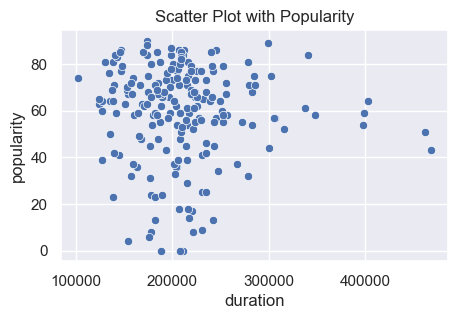

In [149]:
sns.set(rc={'figure.figsize':(5,3)})
sns.scatterplot(data = df_feat, y = 'popularity', x = 'duration')
plt.title('Scatter Plot with Popularity')

In [163]:
from pyod.models.abod import ABOD
outliers_fraction =0.01
abod_clf = ABOD(contamination=outliers_fraction)
abod_clf.fit(df_feat[['speechiness', 'popularity']])

ABOD(contamination=0.01, method='fast', n_neighbors=5)

<AxesSubplot:xlabel='speechiness', ylabel='popularity'>

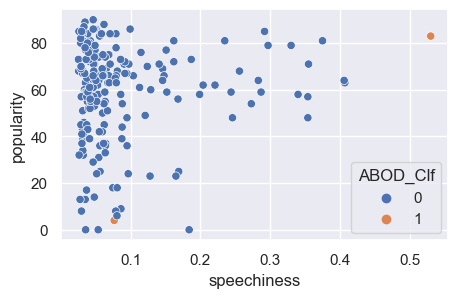

In [164]:
df_feat['ABOD_Clf'] = abod_clf.labels_
sns.scatterplot(data = df_feat, y = 'popularity', x = 'speechiness', hue = 'ABOD_Clf')

In [165]:
df_feat = df_feat[df_feat['ABOD_Clf']==0]

In [166]:
df_feat = df_feat[df_feat['duration']<400000]

In [458]:
df_feat['speechiness'] = np.log(df_feat['speechiness'] + 1)
df_feat['acousticness'] = np.log(df_feat['acousticness'] + 1)

In [459]:
df_feat

,track_uri,track_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,tempo,duration,popularity
0,spotify:track:1AhDOtG9vPSOmsWgNW0BEY,Bohemian Rhapsody - Remastered 2011,0.414,0.404,0,-9.928,0.048695,0.239804,0.000000,71.105,354320,1
1,spotify:track:7o2CTH4ctstm8TNelqjb51,Sweet Child O' Mine,0.454,0.910,6,-7.766,0.043825,0.083054,0.099600,125.116,354520,84
2,spotify:track:1f3yAtsJtY87CTmM8RLnxf,Smells Like Teen Spirit,0.502,0.912,1,-4.556,0.054867,0.000025,0.000173,116.761,301920,13
3,spotify:track:7pKfPomDEeI4TPT6EOYjn9,Imagine - Remastered 2010,0.547,0.257,0,-12.358,0.024888,0.645531,0.183000,75.752,187867,77
4,spotify:track:5NwkWwfRJaT55hEPtCmJHx,You're the Voice,0.369,0.762,10,-8.993,0.045356,0.198851,0.000028,84.957,302107,62
...,...,...,...,...,...,...,...,...,...,...,...,...
895,spotify:track:1k1Bqnv2R0uJXQN4u6LKYt,Ain't No Sunshine,0.527,0.415,4,-11.451,0.115113,0.376380,0.000017,78.169,125093,79
896,spotify:track:2zjjHEviImHmkrUVJ7NxXh,The Best Thing,0.475,0.806,4,-6.693,0.034788,0.331460,0.000749,159.967,250427,0
897,spotify:track:6mz1fBdKATx6qP4oP1I65G,Pony,0.749,0.605,8,-9.359,0.082501,0.001858,0.038100,142.024,251733,73
898,spotify:track:2Q5wSOwq6BDSu7sSVMNrtT,Rock Lobster,0.592,0.882,8,-8.315,0.045738,0.008801,0.015500,92.157,409400,60


In [460]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [378]:
Y = df_feat[['popularity']]
new_df = df_feat.drop(['track_uri', 'track_name','popularity', 'instrumentalness'
                       , 'loudness', 'danceability', 'speechiness', 'duration']
                      , axis =1).reset_index(drop = True)

In [480]:
new_df

,energy,key,acousticness,tempo,instrumentalness
0,0.816,0,0.115113,95.390,1
1,0.225,0,0.569283,81.055,1
2,0.392,10,0.323532,75.065,1
3,0.837,6,0.004052,100.015,1
4,0.865,1,0.227136,159.960,1
...,...,...,...,...,...
190,0.718,8,0.085076,172.039,1
191,0.496,9,0.239804,109.979,1
192,0.781,5,0.065881,123.023,0
193,0.416,11,0.098034,121.465,1


In [380]:
new_df['instrumentalness'] = df_feat['instrumentalness'].reset_index(drop = True)

In [538]:
scaler = StandardScaler()
new_X= scaler.fit_transform(new_df)
new_y = scaler.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=0.2)

In [566]:
#experiment
X = df_feat.drop(['track_uri', 'track_name','popularity', 'key', 'instrumentalness','energy']
                      , axis =1).reset_index(drop = True)
scaler = StandardScaler()
new_X= scaler.fit_transform(X)
new_y = scaler.fit_transform(df_feat[['popularity']])
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=0.2)

In [567]:
X

,danceability,loudness,speechiness,acousticness,tempo,duration
0,0.414,-9.928,0.048695,0.239804,71.105,354320
1,0.454,-7.766,0.043825,0.083054,125.116,354520
2,0.502,-4.556,0.054867,0.000025,116.761,301920
3,0.547,-12.358,0.024888,0.645531,75.752,187867
4,0.369,-8.993,0.045356,0.198851,84.957,302107
...,...,...,...,...,...,...
895,0.527,-11.451,0.115113,0.376380,78.169,125093
896,0.475,-6.693,0.034788,0.331460,159.967,250427
897,0.749,-9.359,0.082501,0.001858,142.024,251733
898,0.592,-8.315,0.045738,0.008801,92.157,409400


In [562]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
r2, rmse

(-0.014977450559395145, 1.010190462101628)

In [535]:
from sklearn.preprocessing import PolynomialFeatures
X_train = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)
model = LinearRegression().fit(X_train, y_train)
X_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
r2, rmse

(-0.16542406817206, 1.0419252199822542)

In [470]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4960
Date:                Fri, 21 Oct 2022   Prob (F-statistic):              0.878
Time:                        00:29:15   Log-Likelihood:                -1020.2
No. Observations:                 720   AIC:                             2060.
Df Residuals:                     710   BIC:                             2106.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0249      0.038      0.665      0.506      -0.049       0.099
x1             0.0531      0.040      1.335      0.182      -0.025       0.131
x2             0.0545      0.058      0.937      0.349      -0.060       0.169
x3             0.0160      0.038      0.424      0.671      -0.058       0.090
x4            -0.0385      0.053     -0.725      0.469      -0.143       0.066
x5            -0.0291      0.039     -0.748      0.455      -0.105       0.047
x6             0.0126      0.046      0.276      0.783      -0.077       0.102
x7            -0.0159      0.037     -0.427      0.670      -0.089       0.057
x8            -0.0289      0.038     -0.756      0.450      -0.104       0.046
x9             0.0120      0.039      0.311      0.756      -0.064       0.088
==============================================================================
Omnibus:                     4840.299   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.363
Skew:                          -0.312   Prob(JB):                     7.91e-19
Kurtosis:                       1.454   Cond. No.                         2.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [568]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train.ravel())
y_pred = reg.predict(X_test)


In [569]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse, r2

(1.0528625107426228, -0.03436171847653435)

In [570]:
reg.feature_importances_

array([0.14053115, 0.16013186, 0.138109  , 0.18638062, 0.18172108,
       0.19312629])

In [419]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train.ravel())
y_pred = regr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test.ravel(), y_pred)
rmse, r2

(1.3495720175336374, -0.22436866122136379)

<AxesSubplot:>

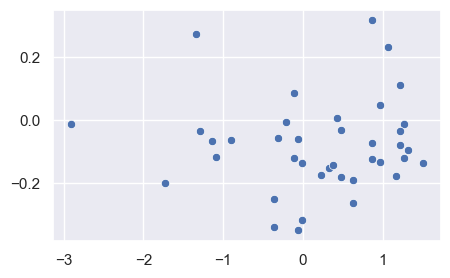

In [431]:
sns.scatterplot(x = y_test.ravel(), y = y_pred.ravel())

In [464]:
from sklearn.feature_selection import SelectKBest, f_classif
test = SelectKBest(score_func=f_classif, k=4)
X = df_feat.drop(['track_uri', 'track_name','popularity']
                      , axis =1).reset_index(drop = True)
y = df_feat['popularity']
fit = test.fit(X, y)
fit.scores_

array([1.14558053, 1.10160824, 0.98383109, 0.86335376, 0.74025524,
       1.06847825, 0.96868216, 0.96866919, 1.30949494])

In [389]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,tempo,duration
0,0.414,0.404,0,-9.928,0.048695,0.239804,1,71.105,354320
1,0.454,0.910,6,-7.766,0.043825,0.083054,1,125.116,354520
2,0.502,0.912,1,-4.556,0.054867,0.000025,1,116.761,301920
3,0.547,0.257,0,-12.358,0.024888,0.645531,0,75.752,187867
4,0.369,0.762,10,-8.993,0.045356,0.198851,1,84.957,302107
...,...,...,...,...,...,...,...,...,...
895,0.527,0.415,4,-11.451,0.115113,0.376380,1,78.169,125093
896,0.475,0.806,4,-6.693,0.034788,0.331460,1,159.967,250427
897,0.749,0.605,8,-9.359,0.082501,0.001858,1,142.024,251733
898,0.592,0.882,8,-8.315,0.045738,0.008801,1,92.157,409400
